In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# just for my dark theme jupyter
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_breast_cancer
from ml_archive import MLArchive

In [4]:
arch = MLArchive()

In [5]:
X, y = load_breast_cancer(return_X_y=True)

In [6]:
names = ["Decision Tree", "Log reg", "Neural Net", "Random Forest"]

classifiers = [
    DecisionTreeClassifier(max_depth=16),
    LogisticRegression(C=0.0001,max_iter=10000, 
             intercept_scaling=False,
             fit_intercept=False),
    Pipeline([('scaler', RobustScaler()),
              ('mlp', MLPClassifier(alpha=0.5,
                                    hidden_layer_sizes=(64,4),
                                    activation='relu',
                                    max_iter=100000,
                                    validation_fraction=0.3,
                                    early_stopping=True, 
                                    random_state=42))]),
    RandomForestClassifier(max_depth=8, n_estimators=50, 
                           max_samples=0.7, random_state=42)]

In [7]:
# iterate over classifiers
print('------------------------------------------------')
for name, clf in zip(names, classifiers):
    cv_results = cross_validate(clf, X, y, cv=5,
                                return_train_score=True)
    print(name + ' train: ' + ('%.2f' % cv_results['train_score'].mean()).lstrip('0'))
    print(name + ' test: ' + ('%.2f' % cv_results['test_score'].mean()).lstrip('0'))
    
    # archive model
    arch.save_model(clf, metric='F1', 
        train_res=cv_results['train_score'].mean(), 
        test_res=cv_results['test_score'].mean())
    print('------------------------------------------------')
# write archive
arch.save_archive('MLModel.arch')

------------------------------------------------
Decision Tree train: 1.00
Decision Tree test: .92
Model 14052020142152699 added in position: 0
------------------------------------------------
Log reg train: .92
Log reg test: .92
Model 14052020142152768 added in position: 0
------------------------------------------------
Neural Net train: .97
Neural Net test: .96
Model 14052020142153340 added in position: 0
------------------------------------------------
Random Forest train: 1.00
Random Forest test: .96
Model 14052020142153871 added in position: 0
------------------------------------------------


In [8]:
arch.get_ranked_models()

,id,technique,model,metric,date,train_res,devel_res,test_res
0,14052020142153871,RandomForestClassifier,"RandomForestClassifier(bootstrap=True, ccp_alp...",F1,14/05/2020 14:21:53,0.996484,None,0.959587
1,14052020142153340,MLPClassifier,"(RobustScaler(copy=True, quantile_range=(25.0,...",F1,14/05/2020 14:21:53,0.968366,None,0.957848
2,14052020142152768,LogisticRegression,"LogisticRegression(C=0.0001, class_weight=None...",F1,14/05/2020 14:21:52,0.921792,None,0.922652
3,14052020142152699,DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",F1,14/05/2020 14:21:52,1.000000,None,0.920882


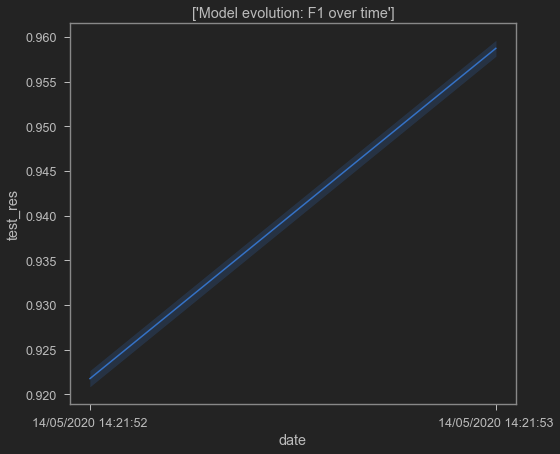

In [9]:
arch.plot_history();